# Vacuole volumetry Analysis (WebKnossos .csv export)
This notebook reads .csv files downloaded from WebKnossos and performs data visualization and hyptothesis testing for the presence and distribution of neurodegenerative vacuoles. 

Before you begin, organize the .stl files as follows - 

    ├── inputs/
    │   ├── condition_name/
    │   │   ├── vacuoles/
    │   │   │   ├── vacuoles.csv
    │   │   └── wholebrain/
    │   │       ├── wholebrain.csv


## Import required packages

In [28]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt, operator as op
import glob
from pathlib import Path
import seaborn as sns
from collections import defaultdict
import pandas as pd


## Set up directories and experiment info 

In [29]:
# Set up input and output directories 
base_path = Path("/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/")
outputs = Path("/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/outputs/liu_bandyadka_2024/webknossos_csv/")

# Create a list of experimental groups being compared (Input folder names must start with items in this list)
conditions = ["repoUASLexARNAi","repoUASdrprRNAi"] 
color_scheme = {"repoUASLexARNAi":"darkorange","repoUASdrprRNAi": "dodgerblue" }
x_label_names = ["repo>LexARNAi","repo>drprRNAi"] 

# Create a list of all mesh files (.stl) to read
csvfiles = dict()
for condition in conditions:
    inputs = glob.glob(str(base_path.joinpath(condition))+"*")
    csvfiles[condition] = inputs

print(csvfiles)

{'repoUASLexARNAi': ['/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_7', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_1', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_6', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_8', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_2024/inputs/repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_3', '/Users/sbandya/Desktop/neurodegeneration_vacuole_quantification/inputs/vacuole_volumetry_protocolpaper_

## Extract whole brain and vacuole volumes 

In [30]:
vacuole_metrics = defaultdict(dict)

for condition in csvfiles.keys():
    for brain in csvfiles[condition]: 

        whole_brain = pd.read_csv(glob.glob(str(brain)+"/wholebrain/*.csv")[0], sep=",",header=0)
        whole_brain_volume_nm3 = whole_brain["volumeInNm3"][0]
        whole_brain_volume_voxel =  whole_brain["volumeInVoxel"][0]
        
        try:
            vacuoles = pd.read_csv(glob.glob(str(brain)+"/vacuoles/*.csv")[0], sep=",",header=0)
            vacuole_volume_nm3 = vacuoles["volumeInNm3"].to_list()
            vacuole_volume_voxel =  vacuoles["volumeInVoxel"].to_list()

            percent_vacuole_volume_per_brain_voxel = 100*sum(vacuole_volume_voxel)/whole_brain_volume_voxel
            percent_vacuole_volume_per_brain_nm3 = 100*sum(vacuole_volume_nm3)/whole_brain_volume_nm3

            vacuole_metrics[brain.split("/")[-1]] = {"condition": condition,
                                                    "num_vacuoles":len(vacuole_volume_nm3),
                                                    "percent_vacuole_volume_nm3": percent_vacuole_volume_per_brain_nm3,
                                                    "percent_vacuole_volume_voxel": percent_vacuole_volume_per_brain_voxel,
                                                    "vacuole_volumes_nm3": vacuole_volume_nm3,
                                                    "vacuole_volumes_voxel" : vacuole_volume_voxel,
                                                    "vacuole_volumes_brain_normalized_nm3": vacuole_volume_nm3/whole_brain_volume_nm3,
                                                    "vacuole_volumes_brain_normalized_voxel": vacuole_volume_voxel/whole_brain_volume_voxel,
                                                    "whole_brain_volume_voxel": whole_brain_volume_voxel,
                                                    "whole_brain_volume_nm3" : whole_brain_volume_nm3
                                                    }
        except IndexError: #If there are no vacuoles in the brain 
            vacuole_metrics[brain.split("/")[-1]] = {"condition": condition,
                                                    "num_vacuoles":0,
                                                    "percent_vacuole_volume_nm3": 0,
                                                    "percent_vacuole_volume_voxel": 0,
                                                    "vacuole_volumes_nm3": [0],
                                                    "vacuole_volumes_voxel" : [0],
                                                    "vacuole_volumes_brain_normalized_nm3": [0],
                                                    "vacuole_volumes_brain_normalized_voxel": [0],
                                                    "whole_brain_volume_voxel": whole_brain_volume_voxel,
                                                    "whole_brain_volume_nm3" : whole_brain_volume_nm3
                                                    } 



## Create a dataframe of vacuole features for downstream analysis

In [31]:
#print(vacuole_metrics)
vacuole_metrics_df = pd.DataFrame.from_dict(vacuole_metrics)
vacuole_metrics_df_t = vacuole_metrics_df.transpose()
vacuole_metrics_df_t['sample'] = vacuole_metrics_df_t.index
vacuole_metrics_df_t[:5]

,condition,num_vacuoles,percent_vacuole_volume_nm3,percent_vacuole_volume_voxel,vacuole_volumes_nm3,vacuole_volumes_voxel,vacuole_volumes_brain_normalized_nm3,vacuole_volumes_brain_normalized_voxel,whole_brain_volume_voxel,whole_brain_volume_nm3,sample
repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_7,repoUASLexARNAi,0,0,0,[0],[0],[0],[0],20514536,7942802816668629,repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_...
repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_1,repoUASLexARNAi,2,0.151251,0.151251,"[1987391128805.452, 11181736956926.057]","[5133, 28880]","[0.00022825776932437926, 0.0012842556746713565]","[0.00022825776932437923, 0.0012842556746713563]",22487734,8706784153231392,repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_...
repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_6,repoUASLexARNAi,7,0.093176,0.093176,"[113056343193.29668, 232307554506.774, 2002491...","[292, 600, 5172, 4192, 1548, 4728, 4568]","[1.2894446414919969e-05, 2.649543783887665e-05...","[1.2894446414919969e-05, 2.649543783887665e-05...",22645408,8767832255480227,repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_...
repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_8,repoUASLexARNAi,3,0.022828,0.022828,"[223015252326.50305, 827014894044.1155, 104383...","[576, 2136, 2696]","[2.4314036037116055e-05, 9.016455030430537e-05...","[2.4314036037116052e-05, 9.016455030430535e-05...",23690020,9172284354027610,repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_...
repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_20240110_3,repoUASLexARNAi,3,0.01547,0.01547,"[196687062815.7353, 560635564876.3479, 6225842...","[508, 1448, 1608]","[2.2050199797381233e-05, 6.285175060355911e-05...","[2.2050199797381236e-05, 6.285175060355911e-05...",23038340,8919967375492653,repoUASLexARNAi_female40D_Phalloidin_DAPI_1.5_...


## Data Exploration and Visualization 
### Distribution of number of vacuoles per brain 

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/2704517126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/2704517126.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45,
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/2704517126.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


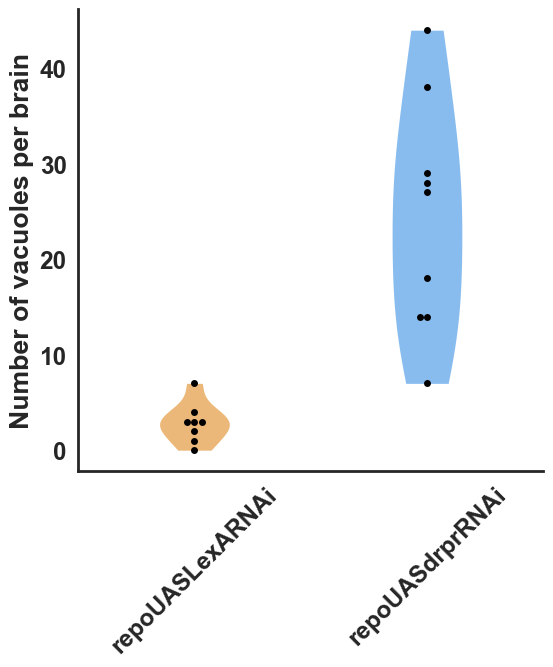

In [32]:

sns.set_style('white')
sns.set_context("paper", font_scale = 2)

fig, ax = plt.subplots( figsize=(6, 6))

sns.violinplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
              x = vacuole_metrics_df_t["condition"], 
              ax=ax, palette=color_scheme, inner=None, linewidth=0,
              width=0.3,cut=0, alpha=0.6)
sns.swarmplot(y= vacuole_metrics_df_t["num_vacuoles"].astype(float),
              x = vacuole_metrics_df_t["condition"], ax=ax, color="black")

sns.despine(right = True)
ax.set_xticklabels(x_label_names, rotation=45,                       
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("Number of vacuoles per brain",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
fig.savefig(outputs.joinpath("num_vacuoles_violin.pdf"), bbox_inches='tight') 

### Percent of whole brain volume occupied by vacuoles 

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/4258720521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y= vacuole_metrics_df_t["percent_vacuole_volume_nm3"].astype(float),
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/4258720521.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45,
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/4258720521.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})


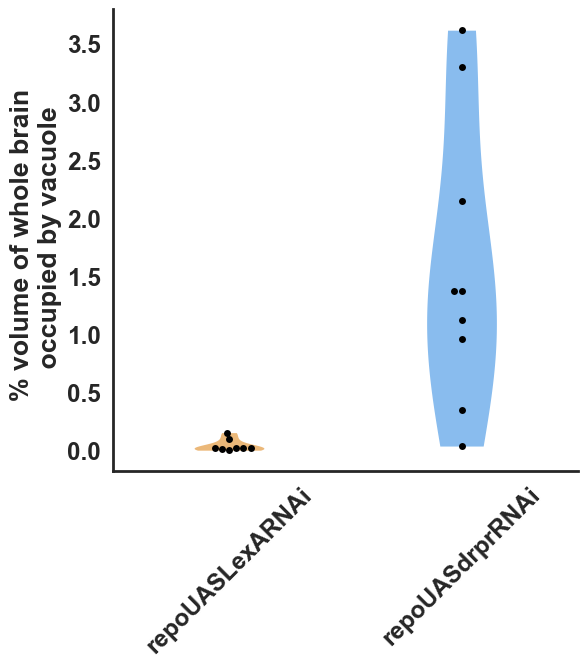

In [33]:
fig, ax = plt.subplots(figsize=(6,6))
sns.violinplot(y= vacuole_metrics_df_t["percent_vacuole_volume_nm3"].astype(float),
              x = vacuole_metrics_df_t["condition"], 
              ax=ax, palette=color_scheme, inner=None, linewidth=0,
              width=0.3,cut=0, alpha=0.6)
sns.swarmplot(y= vacuole_metrics_df_t["percent_vacuole_volume_nm3"].astype(float),
              x = vacuole_metrics_df_t["condition"], ax=ax, color="black")

sns.despine(right = True)
ax.set_xticklabels(x_label_names, rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("% volume of whole brain \n occupied by vacuole",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

fig.savefig(outputs.joinpath("percent_vacuoles_violin.pdf"), bbox_inches='tight') 

### Distribution of vacuole volumes 

/Users/sbandya/miniconda3/envs/hemocyte_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/3527830638.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(conditions, rotation=45,
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/3527830638.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
/Users/sbandya/miniconda3/envs/hemocyte_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the mar

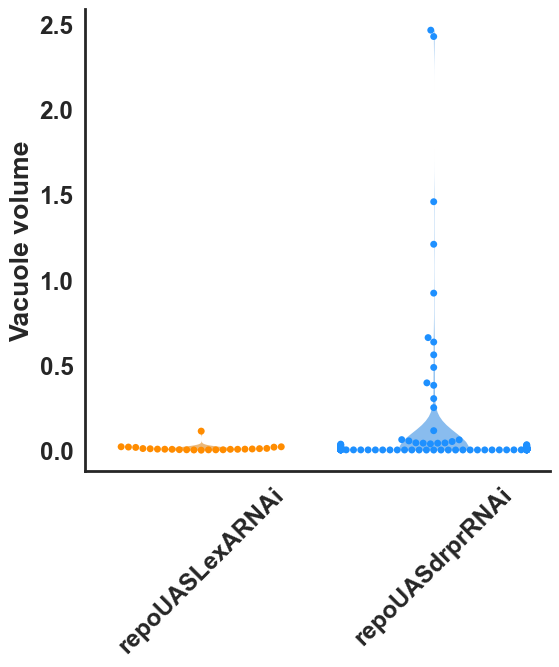

In [34]:
repo_drpr_vacuole_volumes = list()
repo_lexA_vacuole_volumes = list()
for i, row in vacuole_metrics_df_t.iterrows():
    if row["condition"] == "repoUASdrprRNAi":
       repo_drpr_vacuole_volumes.append([i for i in row["vacuole_volumes_nm3"]])
    else:
        repo_lexA_vacuole_volumes.append([i for i in row["vacuole_volumes_nm3"]])
repo_drpr_vacuole_volumes_flat = [i for ic in repo_drpr_vacuole_volumes for i in ic]
repo_lexA_vacuole_volumes_flat = [i for ic in repo_lexA_vacuole_volumes for i in ic] 


fig, ax = plt.subplots(figsize=(6,6))
sns.violinplot({"repoUASLexARNAi" :repo_lexA_vacuole_volumes_flat,
               "repoUASdrprRNAi" :repo_drpr_vacuole_volumes_flat}, 
                palette = color_scheme,  ax = ax, 
                inner=None, linewidth=0,
                width=0.3,cut=0, alpha=0.6)
sns.swarmplot({"repoUASLexARNAi" :repo_lexA_vacuole_volumes_flat,
               "repoUASdrprRNAi" :repo_drpr_vacuole_volumes_flat}, 
                palette = color_scheme,  ax = ax
               )

sns.despine(right = True)
ax.set_xticklabels(x_label_names, rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("Vacuole volume",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

fig.savefig(outputs.joinpath("vacuole_volume_distribution.pdf"), bbox_inches='tight') 

## Compare vacuole features extracted from mesh to volumes exported from webknossos 

In [35]:
%%capture --no-display

meshfiles = dict()
for condition in conditions:
    inputs = glob.glob(str(base_path.joinpath(condition))+"*")
    meshfiles[condition] = inputs



vacuole_metrics = defaultdict(dict)

for condition in meshfiles.keys():
    #For each brain, read the whole brain mesh and all the vacuole meshes 
    for brain in meshfiles[condition]: 
        whole_brain = mesh.Mesh.from_file(glob.glob(str(brain)+"/wholebrain/*.stl")[0])
        vacuoles = glob.glob(str(brain)+"/vacuoles/*.stl")
        
        whole_brain_volume =  whole_brain.get_mass_properties()[0]
        
        vacuole_volumes = list()
        for meshfile in vacuoles:
            vacuole = mesh.Mesh.from_file(meshfile)
            volume, cog, inertia = vacuole.get_mass_properties()
            vacuole_volumes.append(volume)
        
        #calculate the %volume occupied by vacuoles in brain 
        percent_vacuole_volume_per_brain = 100*sum(vacuole_volumes)/whole_brain_volume

        #compile all metrics per brain into a dictionary with brainID as key and metrics as values 
        vacuole_metrics[brain.split("/")[-1]] = {"condition": condition,
                                                 "num_vacuoles":len(vacuole_volumes),
                                                 "percent_vacuole_volume": percent_vacuole_volume_per_brain,
                                                 "vacuole_volumes": vacuole_volumes,
                                                 "vacuole_volumes_brain_normalized": vacuole_volumes/whole_brain_volume,
                                                 "whole_brain_volume": whole_brain_volume
                                                }

# create a dataframe with all vacuole metrics from all brains of all experimental groups. 
vacuole_metrics_df_mesh = pd.DataFrame.from_dict(vacuole_metrics)
vacuole_metrics_df_t_mesh = vacuole_metrics_df_mesh.transpose()
vacuole_metrics_df_t_mesh['sample'] = vacuole_metrics_df_t_mesh.index

compare_mesh_webkossos = pd.merge(vacuole_metrics_df_t, vacuole_metrics_df_t_mesh,
                                   on="sample", suffixes=("_webknossos","_mesh"))

In [36]:
vacuole_volumes_nm3_webknossos = list()
vacuole_volumes_mesh = list()
for i, row in compare_mesh_webkossos.iterrows():
    
    vacuole_volumes_nm3_webknossos.append([i for i in row['vacuole_volumes_nm3']])
    if len(row['vacuole_volumes']) == 0:
        vacuole_volumes_mesh.append([0])
    else:
        vacuole_volumes_mesh.append([i for i in row['vacuole_volumes']])
    
    #break

vacuole_volumes_nm3_webknossos_flat = [i for ic in vacuole_volumes_nm3_webknossos for i in ic]
vacuole_volumes_mesh_flat = [i for ic in vacuole_volumes_mesh for i in ic] 

print(len(vacuole_volumes_nm3_webknossos_flat), len(vacuole_volumes_mesh_flat))

243 243


/Users/sbandya/miniconda3/envs/hemocyte_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 77.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sbandya/miniconda3/envs/hemocyte_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/1901900102.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["WebKnossos","numpy-stl"], rotation=45,
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_75577/1901900102.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

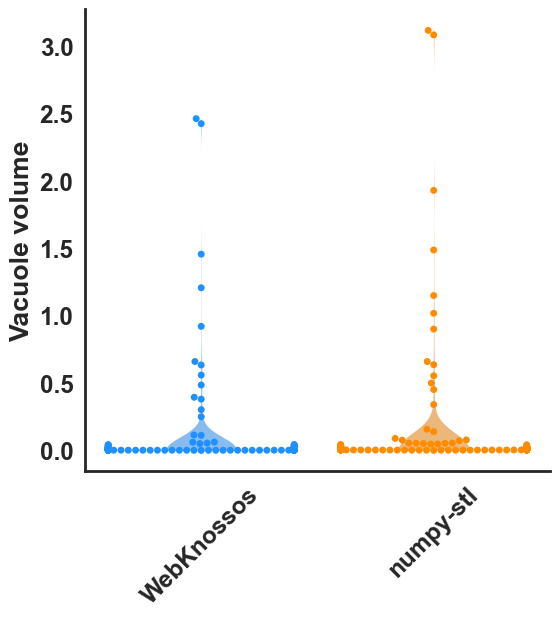

In [37]:
source_color_scheme = {"WebKnossos": "dodgerblue","numpy-stl":"darkorange" }
fig, ax = plt.subplots(figsize=(6,6))
sns.violinplot({"WebKnossos" :vacuole_volumes_nm3_webknossos_flat,
                "numpy-stl": vacuole_volumes_mesh_flat}, 
                palette = source_color_scheme,  ax = ax, 
                inner=None, linewidth=0,
                width=0.3,cut=0, alpha=0.6)
sns.swarmplot({"WebKnossos" : vacuole_volumes_nm3_webknossos_flat,
               "numpy-stl" : vacuole_volumes_mesh_flat}, 
                palette = source_color_scheme,  ax = ax
               )

sns.despine(right = True)
ax.set_xticklabels(["WebKnossos","numpy-stl"], rotation=45,
                  fontdict={'weight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(),fontdict={'weight': 'bold'})
ax.set_ylabel("Vacuole volume",fontdict={'weight': 'bold'})
ax.set_xlabel("")
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

fig.savefig(outputs.joinpath("vacuole_volume_distribution_compare_wbnmp.pdf"), bbox_inches='tight') 